In [1]:
from pymlutil.functions import *
from pymlutil.jsonutil import cmd, ReadDict, WriteDict
from pymlutil.version import VersionString
from pymlutil.s3 import s3store, Connect
import torch
from matplotlib import pyplot as plt

### jsonutil
**ReadDict** returns a python dictionary from a json or yaml dictionary

In [2]:
dict = ReadDict('test.yaml')
dict['test_yaml']

[{'zero': 0}, {'one': 1}, {'two': 2}]

**cmd** executes shell commands and displays the result in the console

In [3]:
cmd('ls -la')

$ ls -la
total 120
drwxrwxr-x 11 blarson blarson  4096 Jun  9 12:10 .
drwxrwxrwx 52 blarson blarson  4096 May 31 14:34 ..
drwxrwxr-x  4 blarson blarson  4096 Apr  4 15:39 build
-rw-rw-r--  1 blarson blarson   729 May  2 17:12 creds.yaml
-rwxrwxr-x  1 blarson blarson  4207 May 23 08:30 deploy
drwxrwxr-x  2 blarson blarson  4096 Jun  9 12:10 dist
drwxrwxr-x  8 blarson blarson  4096 Jun  9 12:09 .git
-rw-rw-r--  1 blarson blarson  1819 Apr 12 22:17 .gitignore
drwxrwxr-x  2 blarson blarson  4096 Apr 13 09:01 img
drwxrwxr-x  2 blarson blarson  4096 Apr 25 10:13 .ipynb_checkpoints
-rw-rw-r--  1 blarson blarson 11357 Apr 12 07:01 LICENSE
drwxrwxr-x  3 blarson blarson  4096 May  2 17:38 pymlutil
drwxrwxr-x  2 blarson blarson  4096 Jun  9 12:10 pymlutil.egg-info
-rw-rw-r--  1 blarson blarson 35083 Jun  9 12:13 pymlutil.ipynb
-rw-rw-r--  1 blarson blarson  1580 May 17 17:49 README.md
-rw-rw-r--  1 blarson blarson  1279 May 23 15:11 setup.py
drwxrwxr-x  4 blarson blarson  4096 May 17 16:24 tests


(0,
 b'',
 b'total 120\ndrwxrwxr-x 11 blarson blarson  4096 Jun  9 12:10 .\ndrwxrwxrwx 52 blarson blarson  4096 May 31 14:34 ..\ndrwxrwxr-x  4 blarson blarson  4096 Apr  4 15:39 build\n-rw-rw-r--  1 blarson blarson   729 May  2 17:12 creds.yaml\n-rwxrwxr-x  1 blarson blarson  4207 May 23 08:30 deploy\ndrwxrwxr-x  2 blarson blarson  4096 Jun  9 12:10 dist\ndrwxrwxr-x  8 blarson blarson  4096 Jun  9 12:09 .git\n-rw-rw-r--  1 blarson blarson  1819 Apr 12 22:17 .gitignore\ndrwxrwxr-x  2 blarson blarson  4096 Apr 13 09:01 img\ndrwxrwxr-x  2 blarson blarson  4096 Apr 25 10:13 .ipynb_checkpoints\n-rw-rw-r--  1 blarson blarson 11357 Apr 12 07:01 LICENSE\ndrwxrwxr-x  3 blarson blarson  4096 May  2 17:38 pymlutil\ndrwxrwxr-x  2 blarson blarson  4096 Jun  9 12:10 pymlutil.egg-info\n-rw-rw-r--  1 blarson blarson 35083 Jun  9 12:13 pymlutil.ipynb\n-rw-rw-r--  1 blarson blarson  1580 May 17 17:49 README.md\n-rw-rw-r--  1 blarson blarson  1279 May 23 15:11 setup.py\ndrwxrwxr-x  4 blarson blarson  409

### functions
**GaussianBasis** computes a unit height gaussian bell curve function
$$ GaussianBasis(x, zero, sigma) = e^{-\frac{(x-zero)^2}{2*sigma^2}} $$
- x : function input
- zero : location of the peak center
- sigma: curve with or standard deviation

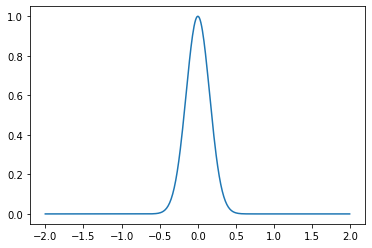

In [4]:
x = np.arange(-2.0, 2.0, 0.01) 
y = GaussianBasis(torch.tensor(x))
plt.plot(x, y)
plt.show()

**GaussianBasis** computes a unit height gaussian bell curve function
$$ SigmoidScale(x, scale = 5, exp = 0.1, maxscale=500) = min(scale+e^{exp*x}, maxscale) $$
- **x:** function input
- **scale:** location of the peak center
- **exp:** curve with or standard deviation
- **maxscale:** curve with or standard deviation


In [1]:
from pymlutil.functions import Sigmoid
x = np.arange(-2.0, 2.0, 0.01) 
y = Sigmoid(x)
plt.plot(x, y)
plt.show()

NameError: name 'np' is not defined

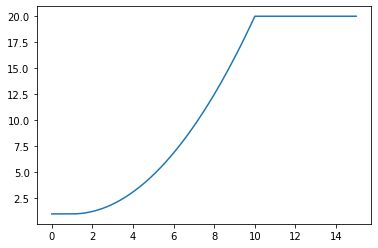

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from pymlutil.functions import Exponential, GaussianBasis


vx = 1.0
vy = 1.0
px = 10.0
py = 20.0
power=2

expf =  Exponential(vx=vx, vy=vy, px=px, py=py, power=power)

x = np.arange(0, px+5, 0.01)
plt.plot(x, expf.f(x))
plt.show()

## S3
The pymutil s3 module provides an interface on top of the python minio library.  Class functions include
- __init__: managing urllib3 certificate and timeout paraemeters for connection to https and http endpoints
- PutDir: write local directory to object storage
- GetDir: 

In [6]:
credentials = "creds.yaml"
s3, creds, s3def = Connect(credentials)
s3def

{'name': 'store',
 'type': 'trainer',
 'address': '198.211.145.1:30990',
 'tls': False,
 'sets': {'dataset': {'bucket': 'mllib',
   'prefix': 'data',
   'dataset_filter': ''},
  'trainingset': {'bucket': 'mllib',
   'prefix': 'training',
   'dataset_filter': ''},
  'model': {'bucket': 'mllib', 'prefix': 'model', 'dataset_filter': ''},
  'test': {'bucket': 'mllib', 'prefix': 'test', 'dataset_filter': ''}}}

In [7]:
dest = '{}/{}'.format(s3def['sets']['dataset']['prefix'], 'testimages')
s3.PutDir(s3def['sets']['dataset']['bucket'], 'dataset', dest)

PutDir: 0it [00:00, ?it/s]


True

pymlutil provides exposes a module command line interface to the following functions

'''cmd
python3 -m pymlutil -p -src tests/testimages -set dataset -dest testimages
'''

In [12]:
! python3 -m pymlutil -p -src tests/testimages -set test -dest notebook/testimageg

PutDir: 100%|████████████████████████████████████| 3/3 [00:00<00:00, 113.81it/s]
pymluitil complete


s3.GitDir copies an S3 path and all sub-objects to a directory from python or command line as follows:

In [9]:
import tempfile
with tempfile.TemporaryDirectory() as tmpdirname:
    s3.GetDir(s3def['sets']['dataset']['bucket'], dest, tmpdirname)

In [16]:
! python3 -m pymlutil -g -src notebook/testimage -set test -dest tests/notebook/testgitdir

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 166.79it/s]
pymluitil complete


The python module -clone parameter copies data from one S3 to another

ssh port forwarding:
```cmd
ssh -L 29990:ai2.cbd:30990 ai@ai2.cbd
```

```yaml
s3:
- name: store
  type: trainer
  address: 10.180.68.235:31994
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"annotations","prefix":"", "dataset_filter":"" }
    trainingset: {"bucket":"trainingset","prefix":"", "dataset_filter":"" }
    model: {"bucket":"savedmodel","prefix":"", "dataset_filter":"" }
    test: {"bucket":"test","prefix":"", "dataset_filter":"" }
- name: ai2
  type: trainer
  address: 127.0.0.1:29990
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"imgml","prefix":"data", "dataset_filter":"" }
    trainingset: {"bucket":"imgml","prefix":"training", "dataset_filter":"" }
    model: {"bucket":"imgml","prefix":"model", "dataset_filter":"" }
    test: {"bucket":"imgml","prefix":"test", "dataset_filter":"" }
```

In [11]:
! python3 -m pymlutil -clone -srcS3 store -destS3 ai2 -src "" -dest lit

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/data/git/pymlutil/pymlutil/__main__.py", line 92, in <module>
    main(args)
  File "/data/git/pymlutil/pymlutil/__main__.py", line 61, in main
    s3Dest, _, s3DestDef = Connect(args.credentials, s3_name=args.destS3)
  File "/data/git/pymlutil/pymlutil/s3.py", line 407, in Connect
    s3 = s3store(s3_creds['address'], 
TypeError: 'NoneType' object is not subscriptable
